# Central Tendancy

In [2]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

In [3]:
forbes_data = pd.read_csv('datasets/forbes.csv')

forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [4]:
forbes_data.isnull()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,True
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [5]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [6]:
forbes_data.dropna(inplace=True)

forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [7]:
forbes_data.shape

(1508, 9)

In [8]:
market_value_mean = forbes_data['Market Value'].mean()

market_value_mean

26.978494031830238

In [9]:
market_value_median = forbes_data['Market Value'].median()

market_value_median

13.1

In [10]:
diff_mean_median = market_value_mean - market_value_median
diff_mean_median

13.878494031830238

In [11]:
# sector is categorical data

forbes_data['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

In [12]:
forbes_data['Sector'].mode()

0    Financials
dtype: object

## box plot

- mean 
- median
- 25th percentile
- 75th percentile
- maximum values are where in the data
- outliers

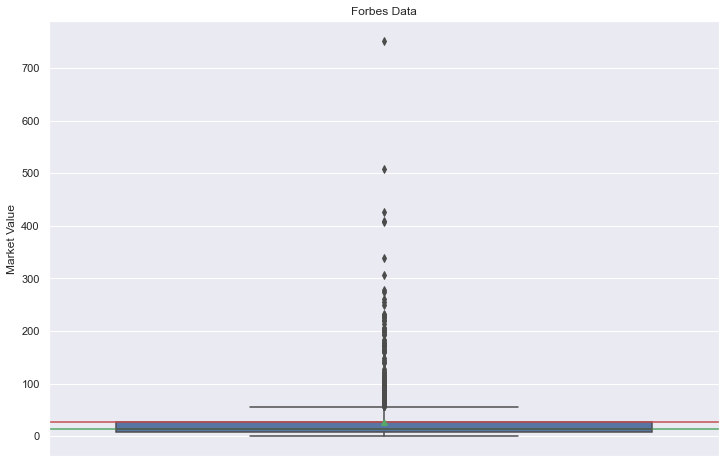

In [13]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y = 'Market Value', showmeans=True)

plt.axhline(y = market_value_mean, color='r', linestyle='-')
plt.axhline(y = market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

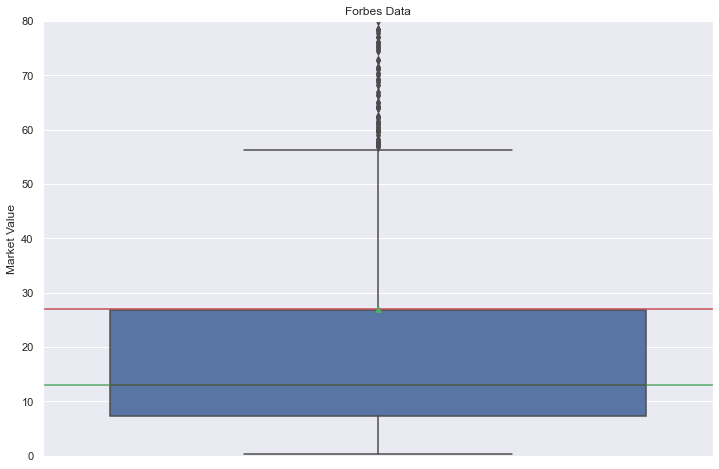

In [14]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y = 'Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y = market_value_mean, color='r', linestyle='-')
plt.axhline(y = market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

## mode


In [16]:
groupded_data = forbes_data.groupby('Sector', as_index=False).count()

groupded_data.head()

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71


In [17]:
groupded_data = groupded_data[['Sector', 'Rank']]

groupded_data = groupded_data.sort_values(by='Rank', ascending=False)

groupded_data

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


## pie chart

- mode
- category wise display values
- percentage of values aquired by category

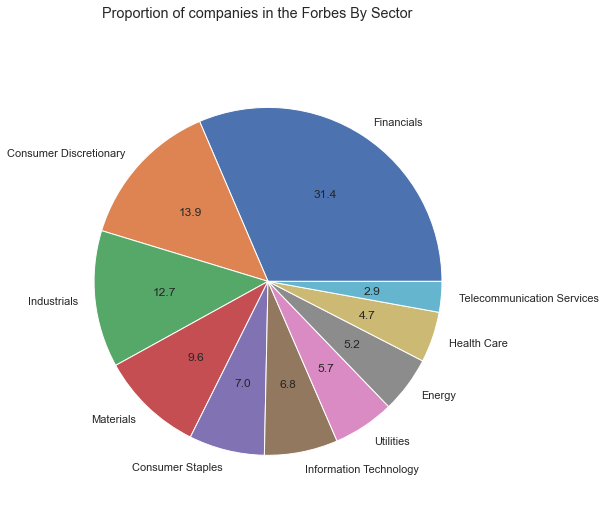

In [19]:
plt.figure(figsize=(12,8))

plt.pie(groupded_data['Rank'], labels=groupded_data['Sector'], autopct='%.1f')

plt.suptitle('Proportion of companies in the Forbes By Sector')

plt.show()